## 1. Pendahuluan

Chapter ini membahas **Generative Models** - model yang dapat generate data baru mirip training data.

### Types of Generative Models:

| Model | Approach | Strengths |
|-------|----------|----------|
| **Autoencoders** | Encode → Decode | Dimensionality reduction, denoising |
| **VAE** | Probabilistic latent space | Smooth interpolation, generation |
| **GANs** | Generator vs Discriminator | High-quality images |
| **Diffusion** | Denoise step by step | State-of-the-art quality |

### Applications:
- 🎨 Image generation & editing
- 🔊 Audio synthesis
- 📝 Text generation
- 🎮 Game content creation
- 🔬 Drug discovery
- 🖼️ Super-resolution, inpainting

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Set random seed
np.random.seed(42)
tf.random.set_seed(42)

print(f"TensorFlow version: {tf.__version__}")

C:\Users\HP Pavilion 15\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


TensorFlow version: 2.20.0


## 2. Autoencoders

**Autoencoder** adalah neural network yang belajar untuk mereconstruct inputnya.

### Architecture:
```
Input → [Encoder] → Latent Code → [Decoder] → Reconstruction
  X          ↓           z            ↓           X̂
         Compress              Decompress
```

### Key Concepts:
- **Encoder**: Compress input ke lower-dimensional representation
- **Latent Space/Code**: Compressed representation
- **Decoder**: Reconstruct dari latent code
- **Loss**: Reconstruction error (MSE atau Binary Cross-Entropy)

In [2]:
# Load Fashion MNIST
(X_train, _), (X_test, _) = keras.datasets.fashion_mnist.load_data()

# Normalize
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten for simple autoencoder
X_train_flat = X_train.reshape(-1, 784)
X_test_flat = X_test.reshape(-1, 784)

print(f"Training data shape: {X_train_flat.shape}")
print(f"Test data shape: {X_test_flat.shape}")

Training data shape: (60000, 784)
Test data shape: (10000, 784)


### 2.1 Simple Autoencoder

In [3]:
# Simple Autoencoder
latent_dim = 32

# Encoder
encoder = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[784]),
    layers.Dense(64, activation='relu'),
    layers.Dense(latent_dim, activation='relu')  # Latent space
], name='encoder')

# Decoder
decoder = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[latent_dim]),
    layers.Dense(128, activation='relu'),
    layers.Dense(784, activation='sigmoid')  # Output [0,1]
], name='decoder')

# Autoencoder
autoencoder = keras.Sequential([encoder, decoder], name='autoencoder')

autoencoder.compile(
    optimizer='adam',
    loss='binary_crossentropy'
)

autoencoder.summary()

C:\Users\HP Pavilion 15\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder (Sequential)            │ (None, 32)             │       110,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Sequential)            │ (None, 784)            │       111,568 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Train
history = autoencoder.fit(
    X_train_flat, X_train_flat,  # Input = Target
    epochs=20,
    batch_size=256,
    validation_data=(X_test_flat, X_test_flat),
    verbose=1
)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.3747 - val_loss: 0.3194
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3102 - val_loss: 0.3075
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3019 - val_loss: 0.3023
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2972 - val_loss: 0.2974
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2938 - val_loss: 0.2946
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2914 - val_loss: 0.2927
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2894 - val_loss: 0.2908
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2880 - val_loss: 0.2898
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2866 - val_loss: 0.2883
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2854 - val_loss: 0.2870
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2843 - val_loss: 0.2860
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

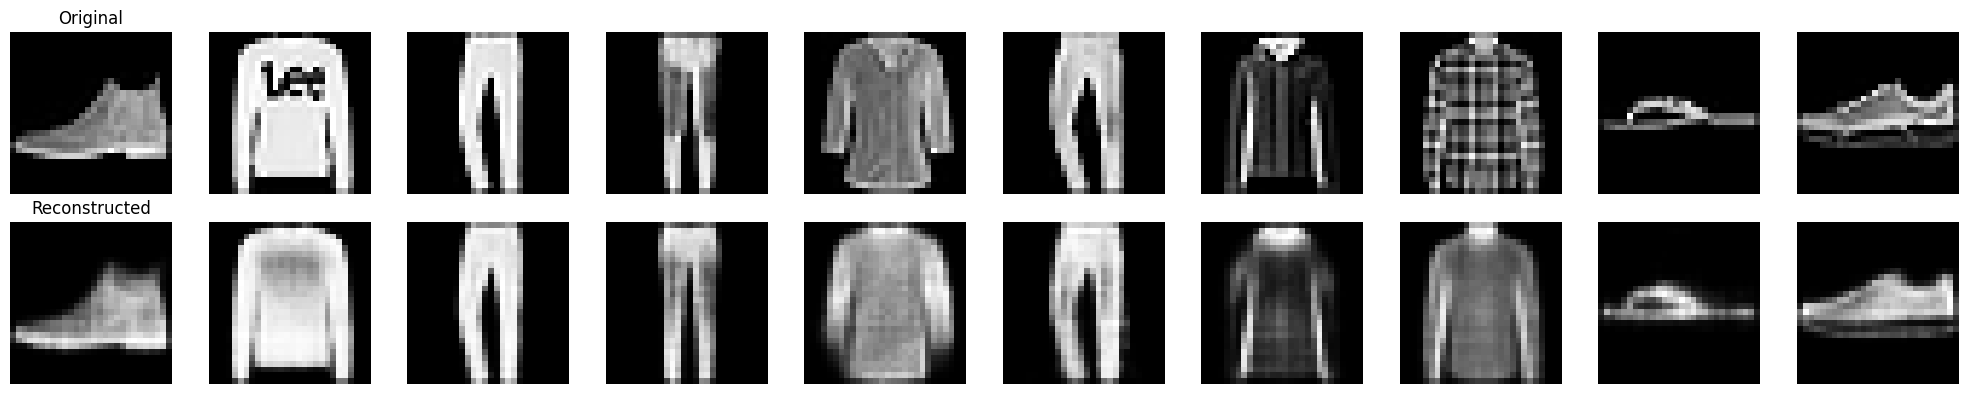

In [5]:
# Visualize reconstructions
def plot_reconstructions(model, X, n=10):
    reconstructions = model.predict(X[:n], verbose=0)
    
    fig, axes = plt.subplots(2, n, figsize=(20, 4))
    for i in range(n):
        # Original
        axes[0, i].imshow(X[i].reshape(28, 28), cmap='gray')
        axes[0, i].axis('off')
        if i == 0:
            axes[0, i].set_title('Original', fontsize=12)
        
        # Reconstruction
        axes[1, i].imshow(reconstructions[i].reshape(28, 28), cmap='gray')
        axes[1, i].axis('off')
        if i == 0:
            axes[1, i].set_title('Reconstructed', fontsize=12)
    
    plt.tight_layout()
    plt.show()

plot_reconstructions(autoencoder, X_test_flat)

### 2.2 Convolutional Autoencoder

In [6]:
# Prepare data for Conv Autoencoder
X_train_conv = X_train[..., np.newaxis]
X_test_conv = X_test[..., np.newaxis]

print(f"Conv data shape: {X_train_conv.shape}")

Conv data shape: (60000, 28, 28, 1)


In [7]:
# Convolutional Autoencoder
conv_encoder = keras.Sequential([
    layers.Conv2D(32, 3, activation='relu', strides=2, padding='same', 
                  input_shape=(28, 28, 1)),
    layers.Conv2D(64, 3, activation='relu', strides=2, padding='same'),
    layers.Flatten(),
    layers.Dense(latent_dim)
], name='conv_encoder')

conv_decoder = keras.Sequential([
    layers.Dense(7 * 7 * 64, input_shape=[latent_dim]),
    layers.Reshape((7, 7, 64)),
    layers.Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same'),
    layers.Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same'),
    layers.Conv2D(1, 3, activation='sigmoid', padding='same')
], name='conv_decoder')

conv_autoencoder = keras.Sequential([conv_encoder, conv_decoder], name='conv_autoencoder')

conv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
conv_autoencoder.summary()

C:\Users\HP Pavilion 15\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "conv_autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_encoder (Sequential)       │ (None, 32)             │       119,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_decoder (Sequential)       │ (None, 28, 28, 1)      │       159,169 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 278,369 (1.06 MB)

 Trainable params: 278,369 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Train Conv Autoencoder
history_conv = conv_autoencoder.fit(
    X_train_conv, X_train_conv,
    epochs=20,
    batch_size=256,
    validation_data=(X_test_conv, X_test_conv),
    verbose=1
)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 72ms/step - loss: 0.3639 - val_loss: 0.3003
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - loss: 0.2884 - val_loss: 0.2844
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 63ms/step - loss: 0.2780 - val_loss: 0.2771
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - loss: 0.2731 - val_loss: 0.2740
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - loss: 0.2704 - val_loss: 0.2717
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - loss: 0.2688 - val_loss: 0.2704
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - loss: 0.2676 - val_loss: 0.2694
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - loss: 0.2667 - val_loss: 0.2690
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - loss: 0.2660 - val_loss: 0.2681
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - loss: 0.2654 - val_loss: 0.2676
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - loss: 0.2650 - val_loss: 0.2671
Epoch 12/20
235/235 ━━━━━━━━━━

### 2.3 Denoising Autoencoder

**Denoising Autoencoder** belajar untuk remove noise dari input.

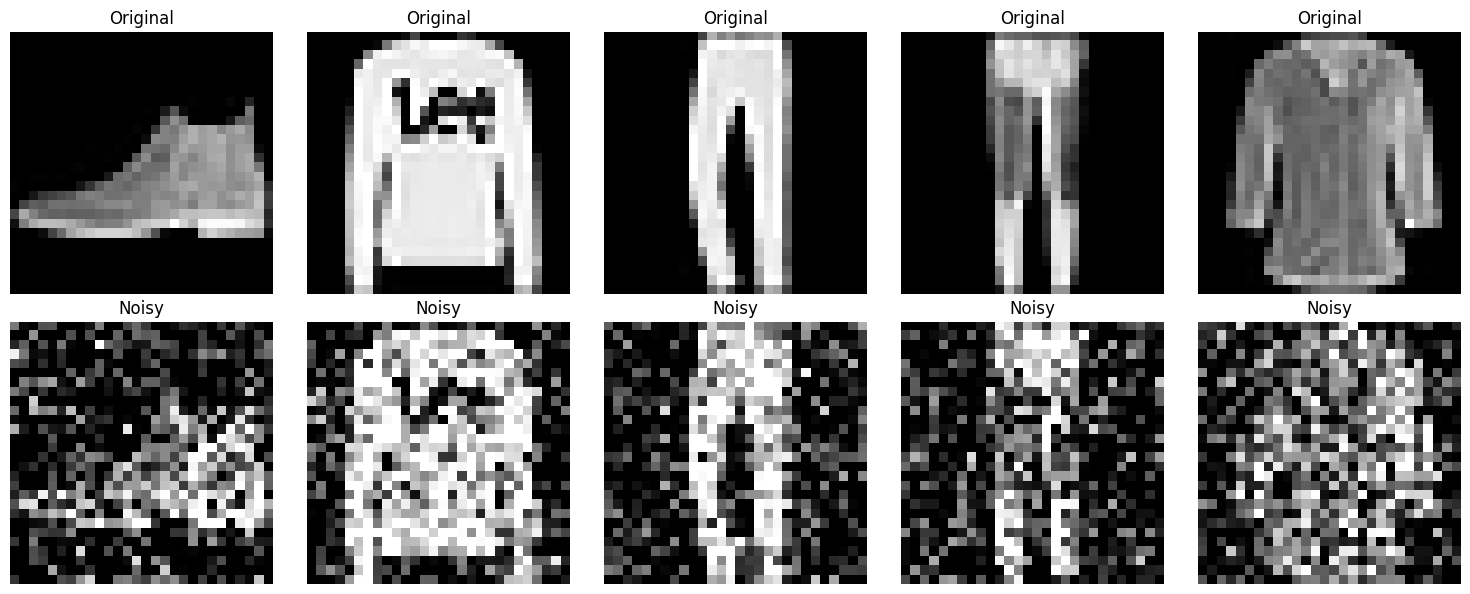

In [9]:
# Add noise to images
noise_factor = 0.35

X_train_noisy = X_train_conv + noise_factor * np.random.normal(size=X_train_conv.shape)
X_test_noisy = X_test_conv + noise_factor * np.random.normal(size=X_test_conv.shape)

X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

# Visualize noisy images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i in range(5):
    axes[0, i].imshow(X_test_conv[i].squeeze(), cmap='gray')
    axes[0, i].set_title('Original')
    axes[0, i].axis('off')
    
    axes[1, i].imshow(X_test_noisy[i].squeeze(), cmap='gray')
    axes[1, i].set_title('Noisy')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

In [10]:
# Train denoising autoencoder
denoising_ae = keras.Sequential([conv_encoder, conv_decoder])
denoising_ae.compile(optimizer='adam', loss='binary_crossentropy')

# Input: noisy, Target: clean
denoising_ae.fit(
    X_train_noisy, X_train_conv,
    epochs=10,
    batch_size=256,
    validation_data=(X_test_noisy, X_test_conv),
    verbose=1
)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 58ms/step - loss: 0.2901 - val_loss: 0.2845
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - loss: 0.2809 - val_loss: 0.2823
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - loss: 0.2791 - val_loss: 0.2811
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.2781 - val_loss: 0.2804
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 67ms/step - loss: 0.2773 - val_loss: 0.2799
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 63ms/step - loss: 0.2767 - val_loss: 0.2794
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.2763 - val_loss: 0.2790
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.2759 - val_loss: 0.2788
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.2756 - val_loss: 0.2785
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.2753 - val_loss: 0.2783


## 3. Variational Autoencoders (VAE)

**VAE** adalah generative model yang mempelajari probabilistic latent space.

### Key Differences dari Standard AE:
- Latent space adalah **probability distribution** (bukan fixed vectors)
- Encoder outputs **mean (μ)** dan **variance (σ²)**
- **Reparameterization trick** untuk backpropagation
- Loss = Reconstruction + KL Divergence

In [11]:
# VAE architecture visualization
print("""
Variational Autoencoder Architecture:

         ┌─────────────┐         ┌─────────────┐
         │   Encoder   │         │   Decoder   │
         │             │         │             │
  Input  │    ┌───┐    │   z     │    ┌───┐    │  Output
   X ───→│───→│ μ │────│───┐     │───→│   │───→│───→ X̂
         │    └───┘    │   │     │    │   │    │
         │             │   ├───→ │    └───┘    │
         │    ┌───┐    │   │     │             │
         │───→│σ² │────│───┘     │             │
         │    └───┘    │         │             │
         └─────────────┘         └─────────────┘

z = μ + σ × ε,  where ε ~ N(0, 1)  (Reparameterization)

Loss = Reconstruction Loss + β × KL Divergence
""")


Variational Autoencoder Architecture:

         ┌─────────────┐         ┌─────────────┐
         │   Encoder   │         │   Decoder   │
         │             │         │             │
  Input  │    ┌───┐    │   z     │    ┌───┐    │  Output
   X ───→│───→│ μ │────│───┐     │───→│   │───→│───→ X̂
         │    └───┘    │   │     │    │   │    │
         │             │   ├───→ │    └───┘    │
         │    ┌───┐    │   │     │             │
         │───→│σ² │────│───┘     │             │
         │    └───┘    │         │             │
         └─────────────┘         └─────────────┘

z = μ + σ × ε,  where ε ~ N(0, 1)  (Reparameterization)

Loss = Reconstruction Loss + β × KL Divergence



In [12]:
# Sampling layer
class Sampling(layers.Layer):
    """Reparameterization trick: z = μ + σ × ε"""
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.random.normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

print("Sampling layer created!")

Sampling layer created!


In [13]:
# VAE Encoder
latent_dim = 2  # For visualization

encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation='relu', strides=2, padding='same')(encoder_inputs)
x = layers.Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)

# Output mean and log variance
z_mean = layers.Dense(latent_dim, name='z_mean')(x)
z_log_var = layers.Dense(latent_dim, name='z_log_var')(x)

# Sample z
z = Sampling()([z_mean, z_log_var])

vae_encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name='vae_encoder')
vae_encoder.summary()

Model: "vae_encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 14, 14,    │        320 │ input_layer_7[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 7, 7, 64)  │     18,496 │ conv2d_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 3136)      │          0 │ conv2d_4[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 128)       │    401,536 │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 2)         │        258 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 2)         │        258 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling (Sampling) │ (None, 2)         │          0 │ z_mean[0][0],     │
│                     │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 420,868 (1.61 MB)

 Trainable params: 420,868 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# VAE Decoder
decoder_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation='relu')(decoder_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)
decoder_outputs = layers.Conv2D(1, 3, activation='sigmoid', padding='same')(x)

vae_decoder = keras.Model(decoder_inputs, decoder_outputs, name='vae_decoder')
vae_decoder.summary()

Model: "vae_decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3136)           │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 14, 14, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 28, 28, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,089 (254.25 KB)

 Trainable params: 65,089 (254.25 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# VAE Model
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name='total_loss')
        self.reconstruction_loss_tracker = keras.metrics.Mean(name='reconstruction_loss')
        self.kl_loss_tracker = keras.metrics.Mean(name='kl_loss')
    
    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker
        ]
    
    def train_step(self, data):
        with tf.GradientTape() as tape:
            # Encode
            z_mean, z_log_var, z = self.encoder(data)
            
            # Decode
            reconstruction = self.decoder(z)
            
            # Reconstruction loss
            reconstruction_loss = tf.reduce_mean(
                keras.losses.binary_crossentropy(data, reconstruction)
            ) * 28 * 28
            
            # KL Divergence loss
            kl_loss = -0.5 * tf.reduce_mean(
                1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
            )
            
            # Total loss
            total_loss = reconstruction_loss + kl_loss
        
        # Backprop
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        
        # Track losses
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        
        return {
            'loss': self.total_loss_tracker.result(),
            'reconstruction_loss': self.reconstruction_loss_tracker.result(),
            'kl_loss': self.kl_loss_tracker.result()
        }

# Create VAE
vae = VAE(vae_encoder, vae_decoder)
vae.compile(optimizer='adam')
print("VAE model created!")

VAE model created!


In [16]:
# Train VAE
vae.fit(
    X_train_conv,
    epochs=30,
    batch_size=128,
    verbose=1
)

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - kl_loss: 3.7703 - loss: 302.5746 - reconstruction_loss: 298.8041
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - kl_loss: 3.6080 - loss: 268.2867 - reconstruction_loss: 264.6787
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - kl_loss: 3.5876 - loss: 264.9433 - reconstruction_loss: 261.3556
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - kl_loss: 3.5750 - loss: 263.0506 - reconstruction_loss: 259.4757
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - kl_loss: 3.5866 - loss: 261.8938 - reconstruction_loss: 258.3072
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - kl_loss: 3.5976 - loss: 261.0494 - reconstruction_loss: 257.4519
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - kl_loss: 3.5865 - loss: 260.2717 - reconstruction_loss: 256.6852
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - kl_loss: 3.6067 - loss: 259.5002 - reconstruction_loss: 255.8936
Epoch 9/30
469/469 ━━━━━━━━━━━━━

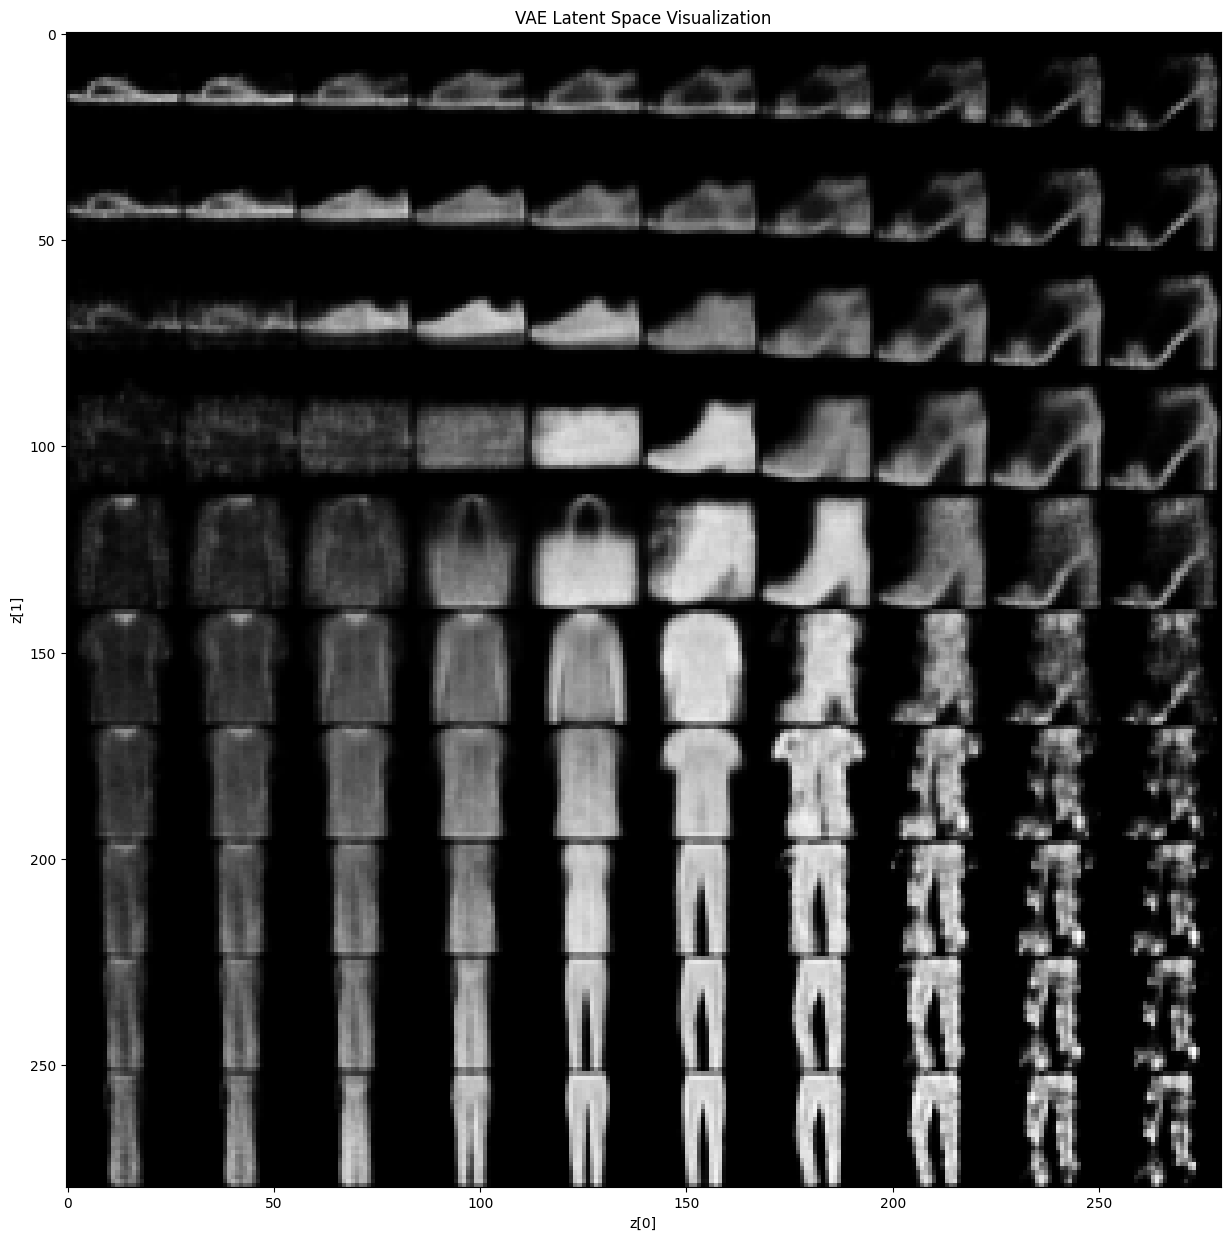

In [17]:
# Visualize latent space
def plot_latent_space(decoder, n=15, figsize=15):
    """Display grid of generated images from latent space"""
    # Linear spaced coordinates on 2D latent space
    grid_x = np.linspace(-3, 3, n)
    grid_y = np.linspace(-3, 3, n)[::-1]
    
    figure = np.zeros((28 * n, 28 * n))
    
    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = decoder.predict(z_sample, verbose=0)
            digit = x_decoded[0].reshape(28, 28)
            figure[i * 28: (i + 1) * 28,
                   j * 28: (j + 1) * 28] = digit
    
    plt.figure(figsize=(figsize, figsize))
    plt.imshow(figure, cmap='gray')
    plt.xlabel('z[0]')
    plt.ylabel('z[1]')
    plt.title('VAE Latent Space Visualization')
    plt.show()

plot_latent_space(vae_decoder, n=10)

## 4. Generative Adversarial Networks (GANs)

**GAN** (Goodfellow et al., 2014) terdiri dari dua networks yang compete:

### Architecture:
- **Generator (G)**: Generate fake data dari noise
- **Discriminator (D)**: Distinguish real vs fake data

### Training Game:
- Generator tries to **fool** discriminator
- Discriminator tries to **detect** fakes
- Both improve through competition!

In [18]:
# GAN visualization
print("""
GAN Architecture:

        Noise z               Real Images
           │                       │
           ▼                       │
    ┌─────────────┐                │
    │  Generator  │                │
    │     (G)     │                │
    └──────┬──────┘                │
           │                       │
           ▼                       ▼
      Fake Images  ──────►  ┌─────────────┐
                            │Discriminator│
                            │     (D)     │
                            └──────┬──────┘
                                   │
                                   ▼
                             Real or Fake?

Loss Functions:
- D tries to maximize: log(D(x)) + log(1 - D(G(z)))
- G tries to minimize: log(1 - D(G(z)))  (or maximize log(D(G(z))))
""")


GAN Architecture:

        Noise z               Real Images
           │                       │
           ▼                       │
    ┌─────────────┐                │
    │  Generator  │                │
    │     (G)     │                │
    └──────┬──────┘                │
           │                       │
           ▼                       ▼
      Fake Images  ──────►  ┌─────────────┐
                            │Discriminator│
                            │     (D)     │
                            └──────┬──────┘
                                   │
                                   ▼
                             Real or Fake?

Loss Functions:
- D tries to maximize: log(D(x)) + log(1 - D(G(z)))
- G tries to minimize: log(1 - D(G(z)))  (or maximize log(D(G(z))))



In [20]:
# GAN parameters
latent_dim = 100
img_shape = (28, 28, 1)

# Generator
generator = keras.Sequential([
    layers.Dense(128, input_dim=latent_dim),
    layers.LeakyReLU(negative_slope=0.2),
    layers.BatchNormalization(momentum=0.8),
    
    layers.Dense(256),
    layers.LeakyReLU(negative_slope=0.2),
    layers.BatchNormalization(momentum=0.8),
    
    layers.Dense(512),
    layers.LeakyReLU(negative_slope=0.2),
    layers.BatchNormalization(momentum=0.8),
    
    layers.Dense(int(np.prod(img_shape)), activation='tanh'),
    layers.Reshape(img_shape)
], name='generator')

generator.summary()

Model: "generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 128)            │        12,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 784)            │       402,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 583,312 (2.23 MB)

 Trainable params: 581,520 (2.22 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [21]:
# Discriminator
discriminator = keras.Sequential([
    layers.Flatten(input_shape=img_shape),
    
    layers.Dense(512),
    layers.LeakyReLU(alpha=0.2),
    
    layers.Dense(256),
    layers.LeakyReLU(alpha=0.2),
    
    layers.Dense(1, activation='sigmoid')
], name='discriminator')

discriminator.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

discriminator.summary()

C:\Users\HP Pavilion 15\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 533,505 (2.04 MB)

 Trainable params: 533,505 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Combined GAN model (for training generator)
discriminator.trainable = False

gan_input = keras.Input(shape=(latent_dim,))
fake_image = generator(gan_input)
gan_output = discriminator(fake_image)

gan = keras.Model(gan_input, gan_output, name='gan')
gan.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
    loss='binary_crossentropy'
)

gan.summary()

Model: "gan"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ generator (Sequential)          │ (None, 28, 28, 1)      │       583,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ discriminator (Sequential)      │ (None, 1)              │       533,505 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,116,817 (4.26 MB)

 Trainable params: 581,520 (2.22 MB)

 Non-trainable params: 535,297 (2.04 MB)

In [23]:
# GAN training function
def train_gan(epochs, batch_size=128, sample_interval=1000):
    # Rescale to [-1, 1] for tanh
    X_train_scaled = X_train_conv * 2 - 1
    
    # Labels
    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))
    
    d_losses = []
    g_losses = []
    
    for epoch in range(epochs):
        # ---------------------
        #  Train Discriminator
        # ---------------------
        
        # Select random real images
        idx = np.random.randint(0, X_train_scaled.shape[0], batch_size)
        real_images = X_train_scaled[idx]
        
        # Generate fake images
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        fake_images = generator.predict(noise, verbose=0)
        
        # Train discriminator
        discriminator.trainable = True
        d_loss_real = discriminator.train_on_batch(real_images, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        
        # ---------------------
        #  Train Generator
        # ---------------------
        
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        discriminator.trainable = False
        g_loss = gan.train_on_batch(noise, real_labels)  # Fool discriminator
        
        d_losses.append(d_loss[0])
        g_losses.append(g_loss)
        
        # Print progress
        if epoch % 500 == 0:
            print(f"Epoch {epoch}: D loss: {d_loss[0]:.4f}, acc: {100*d_loss[1]:.1f}% | G loss: {g_loss:.4f}")
    
    return d_losses, g_losses

print("GAN training function ready!")

GAN training function ready!


In [24]:
# Train GAN (simplified - few epochs for demo)
d_losses, g_losses = train_gan(epochs=3000, batch_size=64)

Epoch 0: D loss: 0.6284, acc: 66.8% | G loss: 0.7769
Epoch 500: D loss: 0.3042, acc: 86.1% | G loss: 2.7826
Epoch 1000: D loss: 0.4296, acc: 79.4% | G loss: 1.8963
Epoch 1500: D loss: 0.4741, acc: 76.8% | G loss: 1.5980
Epoch 2000: D loss: 0.4950, acc: 75.5% | G loss: 1.4612
Epoch 2500: D loss: 0.5103, acc: 74.4% | G loss: 1.3802


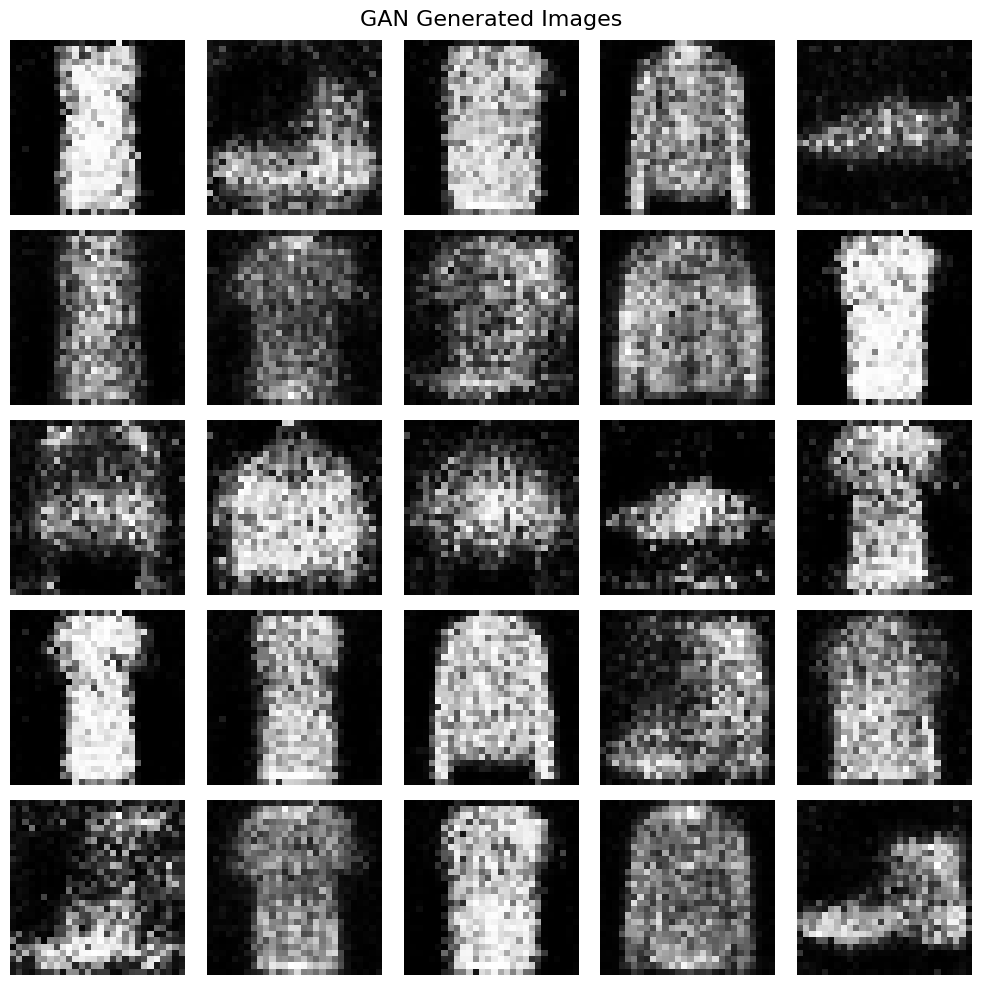

In [26]:
# Generate and visualize images
def sample_images(generator, n=5):
    noise = np.random.normal(0, 1, (n * n, latent_dim))
    generated = generator.predict(noise, verbose=0)
    generated = 0.5 * generated + 0.5  # Rescale to [0, 1]
    
    fig, axes = plt.subplots(n, n, figsize=(10, 10))
    for i in range(n):
        for j in range(n):
            axes[i, j].imshow(generated[i * n + j].squeeze(), cmap='gray')
            axes[i, j].axis('off')
    
    plt.suptitle('GAN Generated Images', fontsize=16)
    plt.tight_layout()
    plt.show()

sample_images(generator)

## 5. Deep Convolutional GANs (DCGANs)

**DCGAN** guidelines untuk stable training:

1. ✅ Use **strided convolutions** (discriminator) dan **transposed convolutions** (generator)
2. ✅ Use **Batch Normalization** di generator dan discriminator
3. ✅ Remove fully connected layers
4. ✅ Use **ReLU** di generator (except output: Tanh)
5. ✅ Use **LeakyReLU** di discriminator

In [27]:
# DCGAN Generator
def build_dcgan_generator(latent_dim):
    model = keras.Sequential([
        # Foundation
        layers.Dense(7 * 7 * 256, use_bias=False, input_shape=(latent_dim,)),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Reshape((7, 7, 256)),
        
        # Upsampling
        layers.Conv2DTranspose(128, 5, strides=1, padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        
        layers.Conv2DTranspose(64, 5, strides=2, padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        
        # Output
        layers.Conv2DTranspose(1, 5, strides=2, padding='same', 
                               use_bias=False, activation='tanh')
    ], name='dcgan_generator')
    
    return model

dcgan_gen = build_dcgan_generator(latent_dim)
dcgan_gen.summary()

Model: "dcgan_generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 12544)          │     1,254,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 12544)          │        50,176 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_3 (Reshape)             │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 7, 7, 128)      │       819,200 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_5              │ (None, 14, 14, 64)     │       204,800 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_6              │ (None, 28, 28, 1)      │         1,600 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,330,944 (8.89 MB)

 Trainable params: 2,305,472 (8.79 MB)

 Non-trainable params: 25,472 (99.50 KB)

In [28]:
# DCGAN Discriminator
def build_dcgan_discriminator():
    model = keras.Sequential([
        layers.Conv2D(64, 5, strides=2, padding='same', input_shape=(28, 28, 1)),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.3),
        
        layers.Conv2D(128, 5, strides=2, padding='same'),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.3),
        
        layers.Flatten(),
        layers.Dense(1, activation='sigmoid')
    ], name='dcgan_discriminator')
    
    return model

dcgan_disc = build_dcgan_discriminator()
dcgan_disc.summary()

Model: "dcgan_discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 7, 7, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_12 (LeakyReLU)      │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │         6,273 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 212,865 (831.50 KB)

 Trainable params: 212,865 (831.50 KB)

 Non-trainable params: 0 (0.00 B)

## 6. GAN Training Challenges

### Common Problems:

| Problem | Description | Solution |
|---------|-------------|----------|
| **Mode Collapse** | Generator produces limited variety | Minibatch discrimination, unrolled GANs |
| **Training Instability** | Loss oscillates wildly | Spectral normalization, gradient penalty |
| **Vanishing Gradients** | D too good → G gets no learning signal | Label smoothing, WGAN |
| **Non-convergence** | Never reaches equilibrium | Two-timescale update rule |

In [29]:
# Training tips
print("""
GAN Training Tips:

1. Label Smoothing:
   - Real labels: 0.9 instead of 1.0
   - Prevents discriminator overconfidence

2. Noise Addition:
   - Add small noise to discriminator inputs
   - Helps stabilize training

3. Learning Rate:
   - Use small learning rates (0.0001-0.0002)
   - Adam with beta1=0.5

4. Architecture:
   - Follow DCGAN guidelines
   - BatchNorm (but not in D output layer)
   - LeakyReLU in discriminator

5. Training Balance:
   - Don't let D get too strong
   - May train G multiple times per D step
""")


GAN Training Tips:

1. Label Smoothing:
   - Real labels: 0.9 instead of 1.0
   - Prevents discriminator overconfidence

2. Noise Addition:
   - Add small noise to discriminator inputs
   - Helps stabilize training

3. Learning Rate:
   - Use small learning rates (0.0001-0.0002)
   - Adam with beta1=0.5

4. Architecture:
   - Follow DCGAN guidelines
   - BatchNorm (but not in D output layer)
   - LeakyReLU in discriminator

5. Training Balance:
   - Don't let D get too strong
   - May train G multiple times per D step



## 7. GAN Variants

### 7.1 Popular GAN Architectures

| GAN Variant | Key Innovation | Use Case |
|-------------|---------------|----------|
| **DCGAN** | Convolutional architecture | General image generation |
| **WGAN** | Wasserstein distance | Stable training |
| **WGAN-GP** | Gradient penalty | More stable |
| **StyleGAN** | Style-based generator | High-quality faces |
| **CycleGAN** | Unpaired translation | Style transfer |
| **Pix2Pix** | Paired translation | Image-to-image |
| **ProGAN** | Progressive growing | High resolution |
| **BigGAN** | Large scale | Class-conditional |

In [30]:
# Conditional GAN concept
print("""
Conditional GAN (cGAN):

Add class label information to both G and D.

Generator:
  z (noise) + y (label) → Fake image

Discriminator:
  Image + y (label) → Real/Fake

Allows controlled generation:
  "Generate a cat image" → G(z, y='cat')
""")


Conditional GAN (cGAN):

Add class label information to both G and D.

Generator:
  z (noise) + y (label) → Fake image

Discriminator:
  Image + y (label) → Real/Fake

Allows controlled generation:
  "Generate a cat image" → G(z, y='cat')



In [31]:
# WGAN-GP loss (conceptual)
print("""
Wasserstein GAN with Gradient Penalty (WGAN-GP):

Instead of Binary Cross Entropy:
- D outputs unbounded score (no sigmoid)
- Wasserstein distance as loss
- Gradient penalty instead of weight clipping

D_loss = D(fake) - D(real) + λ * gradient_penalty
G_loss = -D(fake)

Benefits:
- More stable training
- Meaningful loss metric
- Less mode collapse
""")


Wasserstein GAN with Gradient Penalty (WGAN-GP):

Instead of Binary Cross Entropy:
- D outputs unbounded score (no sigmoid)
- Wasserstein distance as loss
- Gradient penalty instead of weight clipping

D_loss = D(fake) - D(real) + λ * gradient_penalty
G_loss = -D(fake)

Benefits:
- More stable training
- Meaningful loss metric
- Less mode collapse



## 8. Diffusion Models

**Diffusion Models** adalah state-of-the-art generative models (DALL-E 2, Stable Diffusion, Midjourney).

### Key Idea:
1. **Forward Process**: Gradually add noise ke image
2. **Reverse Process**: Learn to remove noise step by step

In [32]:
# Diffusion process visualization
print("""
Diffusion Model Process:

Forward Process (Noising):
  x₀ → x₁ → x₂ → ... → xₜ → ... → xT (pure noise)
  
  At each step, add small Gaussian noise:
  xₜ = √(1-βₜ) × xₜ₋₁ + √βₜ × ε,  ε ~ N(0, I)

Reverse Process (Denoising) - LEARNED:
  xT → x̂ₜ₋₁ → ... → x̂₁ → x̂₀ (generated image)
  
  Neural network predicts noise to remove:
  x̂ₜ₋₁ = (xₜ - predicted_noise) / scaling

Training:
- Sample image x₀
- Sample timestep t
- Add noise to get xₜ
- Train model to predict added noise
""")


Diffusion Model Process:

Forward Process (Noising):
  x₀ → x₁ → x₂ → ... → xₜ → ... → xT (pure noise)
  
  At each step, add small Gaussian noise:
  xₜ = √(1-βₜ) × xₜ₋₁ + √βₜ × ε,  ε ~ N(0, I)

Reverse Process (Denoising) - LEARNED:
  xT → x̂ₜ₋₁ → ... → x̂₁ → x̂₀ (generated image)
  
  Neural network predicts noise to remove:
  x̂ₜ₋₁ = (xₜ - predicted_noise) / scaling

Training:
- Sample image x₀
- Sample timestep t
- Add noise to get xₜ
- Train model to predict added noise



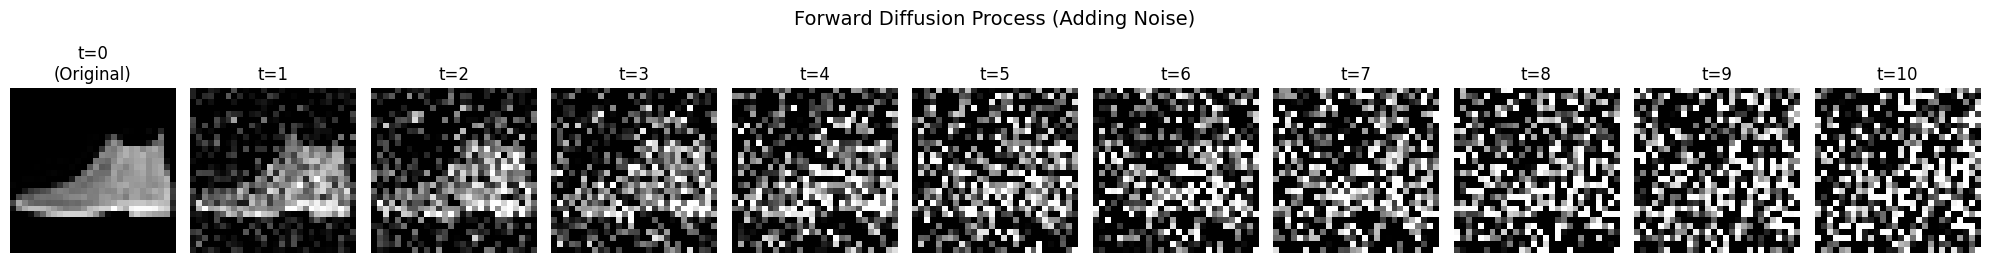

In [33]:
# Visualize forward diffusion
def visualize_diffusion(image, num_steps=10):
    """Visualize forward diffusion process"""
    fig, axes = plt.subplots(1, num_steps + 1, figsize=(20, 3))
    
    # Original
    axes[0].imshow(image.squeeze(), cmap='gray')
    axes[0].set_title('t=0\n(Original)')
    axes[0].axis('off')
    
    # Add noise progressively
    noisy = image.copy()
    for t in range(1, num_steps + 1):
        beta = t / num_steps * 0.3  # Noise schedule
        noise = np.random.normal(0, 1, image.shape)
        noisy = np.sqrt(1 - beta) * noisy + np.sqrt(beta) * noise
        
        axes[t].imshow(np.clip(noisy.squeeze(), 0, 1), cmap='gray')
        axes[t].set_title(f't={t}')
        axes[t].axis('off')
    
    plt.suptitle('Forward Diffusion Process (Adding Noise)', fontsize=14)
    plt.tight_layout()
    plt.show()

# Visualize
visualize_diffusion(X_test_conv[0])

In [34]:
# Simple diffusion model (conceptual)
def build_simple_diffusion_model():
    """Simple U-Net style denoising model"""
    # Input: noisy image + timestep embedding
    image_input = keras.Input(shape=(28, 28, 1))
    time_input = keras.Input(shape=(1,))
    
    # Time embedding
    t = layers.Dense(64, activation='relu')(time_input)
    t = layers.Dense(64)(t)
    
    # Encoder
    x = layers.Conv2D(32, 3, padding='same', activation='relu')(image_input)
    x = layers.Conv2D(64, 3, strides=2, padding='same', activation='relu')(x)
    
    # Add time embedding
    t_expand = layers.RepeatVector(14 * 14)(t)
    t_expand = layers.Reshape((14, 14, 64))(t_expand)
    x = layers.Concatenate()([x, t_expand])
    
    # Middle
    x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
    
    # Decoder
    x = layers.Conv2DTranspose(64, 3, strides=2, padding='same', activation='relu')(x)
    x = layers.Conv2D(32, 3, padding='same', activation='relu')(x)
    
    # Output: predicted noise
    output = layers.Conv2D(1, 3, padding='same')(x)
    
    return keras.Model([image_input, time_input], output)

diffusion_model = build_simple_diffusion_model()
print("Simple diffusion model:")
diffusion_model.summary()

Simple diffusion model:


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_15      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_22 (Dense)    │ (None, 64)        │        128 │ input_layer_15[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_14      │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_23 (Dense)    │ (None, 64)        │      4,160 │ dense_22[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 28, 28,    │        320 │ input_layer_14[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector       │ (None, 196, 64)   │          0 │ dense_23[0][0]    │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 14, 14,    │     18,496 │ conv2d_8[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_4 (Reshape) │ (None, 14, 14,    │          0 │ repeat_vector[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 14, 14,    │          0 │ conv2d_9[0][0],   │
│ (Concatenate)       │ 128)              │            │ reshape_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 14, 14,    │    147,584 │ concatenate[0][0] │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_7  │ (None, 28, 28,    │     73,792 │ conv2d_10[0][0]   │
│ (Conv2DTranspose)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 28, 28,    │     18,464 │ conv2d_transpose… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 28, 28, 1) │        289 │ conv2d_11[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 263,233 (1.00 MB)

 Trainable params: 263,233 (1.00 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# Comparison: VAE vs GAN vs Diffusion
print("""
Comparison of Generative Models:

┌─────────────┬────────────────┬────────────────┬────────────────┐
│  Aspect     │      VAE       │      GAN       │   Diffusion    │
├─────────────┼────────────────┼────────────────┼────────────────┤
│ Training    │ Stable         │ Tricky         │ Stable         │
│ Quality     │ Blurry         │ Sharp          │ Best           │
│ Speed       │ Fast           │ Fast           │ Slow           │
│ Diversity   │ Good           │ Mode collapse  │ Excellent      │
│ Latent      │ Interpretable  │ Entangled      │ Complex        │
│ Likelihood  │ Yes (ELBO)     │ No             │ Yes            │
└─────────────┴────────────────┴────────────────┴────────────────┘

Modern state-of-the-art: Diffusion models (DALL-E, Stable Diffusion)
""")


Comparison of Generative Models:

┌─────────────┬────────────────┬────────────────┬────────────────┐
│  Aspect     │      VAE       │      GAN       │   Diffusion    │
├─────────────┼────────────────┼────────────────┼────────────────┤
│ Training    │ Stable         │ Tricky         │ Stable         │
│ Quality     │ Blurry         │ Sharp          │ Best           │
│ Speed       │ Fast           │ Fast           │ Slow           │
│ Diversity   │ Good           │ Mode collapse  │ Excellent      │
│ Latent      │ Interpretable  │ Entangled      │ Complex        │
│ Likelihood  │ Yes (ELBO)     │ No             │ Yes            │
└─────────────┴────────────────┴────────────────┴────────────────┘

Modern state-of-the-art: Diffusion models (DALL-E, Stable Diffusion)



## 9. Kesimpulan

### Key Takeaways:

1. **Autoencoders:**
   - Encoder-Decoder untuk reconstruction
   - Applications: compression, denoising, anomaly detection
   - Convolutional AE untuk images

2. **Variational Autoencoders (VAE):**
   - Probabilistic latent space
   - Reparameterization trick untuk training
   - Loss = Reconstruction + KL Divergence
   - Smooth latent space for generation

3. **Generative Adversarial Networks (GANs):**
   - Generator vs Discriminator game
   - Sharp high-quality outputs
   - DCGAN guidelines for stable training
   - Challenges: mode collapse, instability

4. **GAN Variants:**
   - WGAN/WGAN-GP untuk stability
   - StyleGAN untuk high-quality faces
   - CycleGAN untuk unpaired translation

5. **Diffusion Models:**
   - State-of-the-art quality
   - Forward: add noise gradually
   - Reverse: learn to denoise
   - Powers DALL-E, Stable Diffusion, Midjourney

### Model Selection:

| Use Case | Recommended |
|----------|-------------|
| Dimensionality reduction | Autoencoder |
| Anomaly detection | Autoencoder, VAE |
| Image generation | Diffusion, GAN |
| Smooth interpolation | VAE |
| Style transfer | CycleGAN |
| Super-resolution | ESRGAN, Diffusion |

In [36]:
# Summary visualization
print("""
┌─────────────────────────────────────────────────────────────────┐
│                  Generative Models Summary                       │
├─────────────────────────────────────────────────────────────────┤
│                                                                  │
│  Autoencoder:   X → [Encode] → z → [Decode] → X̂                 │
│                          (reconstruction)                        │
│                                                                  │
│  VAE:           X → [Encode] → (μ, σ) → z ~ N(μ,σ) → [Decode]   │
│                          (probabilistic)                         │
│                                                                  │
│  GAN:           z → [Generator] → Fake                          │
│                  Fake + Real → [Discriminator] → Real/Fake      │
│                          (adversarial)                           │
│                                                                  │
│  Diffusion:     x₀ → add noise → xT → denoise → x̂₀              │
│                          (iterative)                             │
│                                                                  │
└─────────────────────────────────────────────────────────────────┘
""")


┌─────────────────────────────────────────────────────────────────┐
│                  Generative Models Summary                       │
├─────────────────────────────────────────────────────────────────┤
│                                                                  │
│  Autoencoder:   X → [Encode] → z → [Decode] → X̂                 │
│                          (reconstruction)                        │
│                                                                  │
│  VAE:           X → [Encode] → (μ, σ) → z ~ N(μ,σ) → [Decode]   │
│                          (probabilistic)                         │
│                                                                  │
│  GAN:           z → [Generator] → Fake                          │
│                  Fake + Real → [Discriminator] → Real/Fake      │
│                          (adversarial)                           │
│                                                                  │
│  Diffusion:     x₀ → add noise → xT 